In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier


In [2]:
my_frame = pd.read_csv('titanic.csv',sep=';')

my_frame['Cabin'].mode()
my_frame['Cabin'].fillna('C27', inplace=True)

my_frame['Embarked'].mode()
my_frame['Embarked'].fillna('S', inplace=True)

my_frame['Age'].fillna(my_frame['Age'].mean(), inplace=True)



encoder = LabelEncoder()

my_frame['Survived'] = encoder.fit_transform(my_frame['Survived']) # yes: 1 ; no: 0 

my_frame['Sex'] = encoder.fit_transform(my_frame['Sex']) # female : 1  ; male: 0

In [3]:
my_frame.head()
my_frame.isnull().sum()
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [4]:
my_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,C27,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,C27,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,C27,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
x = my_frame[['Pclass', 'Sex', 'Age' ]]
y = my_frame['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40,random_state=0)

model =tree.DecisionTreeClassifier()  
model = model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))




score:0.7955182072829131


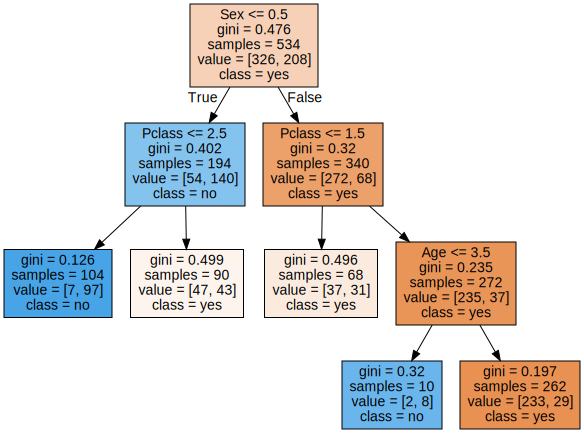

In [25]:

plotting_tre =tree.export_graphviz(model, out_file=None, 
                                feature_names=['Pclass', 'Sex', 'Age' ],
                                class_names=['yes', 'no'],
                                filled=True)

# Draw graph
graph = graphviz.Source(plotting_tre, format="png") 
graph

If an individual is male and class 1 then he will not survive

In [24]:
x = my_frame[['Pclass', 'Sex', 'Age' ]]
y = my_frame['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40,random_state=0)

model =tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=5)  
model = model.fit(x_train, y_train)   
y_pred=model.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8011204481792717


the score of the prediction varies when the parameters change,
the more the values of the parameters are minimal the prediction of our model is higher and more exact.

In [144]:

x = my_frame[['Pclass', 'Sex', 'Age' ]]
y = my_frame['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40,random_state=0)

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
      

Accuracy: 0.7955182072829131


In [26]:
x = my_frame[['Pclass', 'Sex', 'Age' ]]
y = my_frame['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40,random_state=0)

clf=RandomForestClassifier(n_estimators=50)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.803921568627451


The prediction of our model becomes more precise as the n_estimators take higher values